# h1n1_Vaccine prediction

## Problem statement

To find whether the person is vaccinated or not. h1n1_vaccine is the dependent variable classification

In [180]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [181]:
vaccine=pd.read_csv("h1n1_vaccine_prediction.csv")

In [182]:
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [183]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [184]:
vaccine.shape

(26707, 34)

In [185]:
vaccine.dtypes.value_counts()

float64    23
object      9
int64       2
Name: count, dtype: int64

In [186]:
vaccine.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [187]:
vaccine.drop(['unique_id'], inplace = True, axis = 1)


In [188]:
vaccine.isnull().sum()


h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [189]:
vaccine['h1n1_worry'].unique()
# 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried

array([ 1.,  3.,  2.,  0., nan])

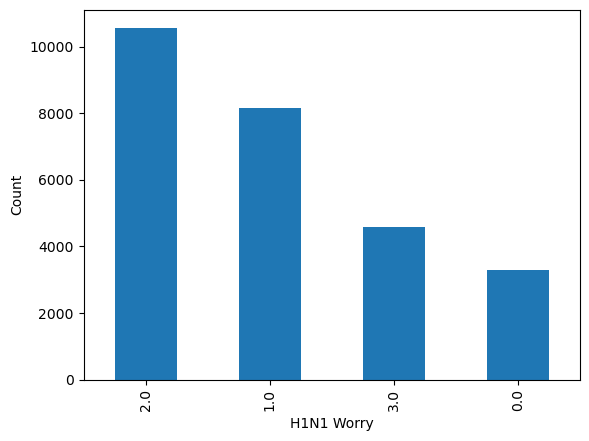

In [190]:
vaccine['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()

In [191]:
display(vaccine['h1n1_worry'].mode(), vaccine['h1n1_worry'].median())

0    2.0
Name: h1n1_worry, dtype: float64

2.0

In [192]:
# Filling 92 missing values by mode
vaccine['h1n1_worry'].fillna(vaccine['h1n1_worry'].mode()[0], inplace = True)

In [193]:
vaccine['h1n1_awareness'].unique()
# 0=No knowledge, 1=little knowledge, 2=good knowledge


array([ 0.,  2.,  1., nan])

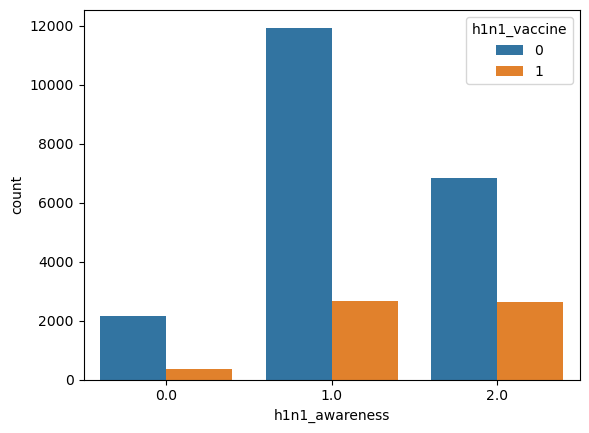

In [194]:
sns.countplot(x = 'h1n1_awareness', data = vaccine, hue = 'h1n1_vaccine')
plt.show()

In [195]:
vaccine['h1n1_awareness'].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [196]:
# Filling 192 missing values by mode
vaccine['h1n1_awareness'].fillna(vaccine['h1n1_awareness'].mode()[0], inplace = True)

In [197]:
vaccine['antiviral_medication'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

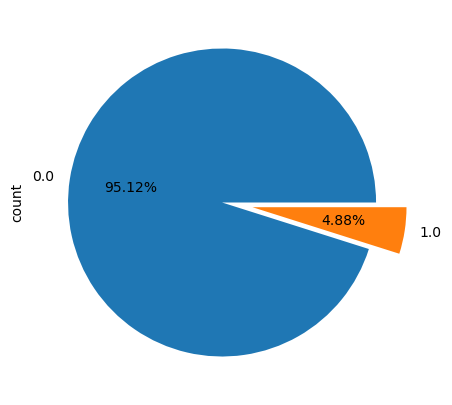

In [198]:
vaccine['antiviral_medication'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()

In [199]:
display(vaccine['antiviral_medication'].mode())
# missing 71 missing values by mode
vaccine['antiviral_medication'].fillna(vaccine['antiviral_medication'].mode()[0], inplace = True)

0    0.0
Name: antiviral_medication, dtype: float64

In [200]:
vaccine['contact_avoidance'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

In [201]:
vaccine['contact_avoidance'].value_counts()

contact_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64

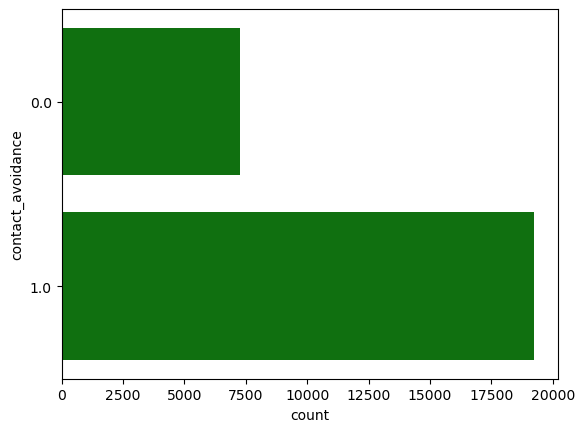

In [202]:
sns.countplot(y = 'contact_avoidance', data = vaccine, color = 'green')
plt.show()


In [203]:
# filling 208 missing values by mode
vaccine['contact_avoidance'].fillna(vaccine['contact_avoidance'].mode()[0], inplace = True)

In [204]:
vaccine['bought_face_mask'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

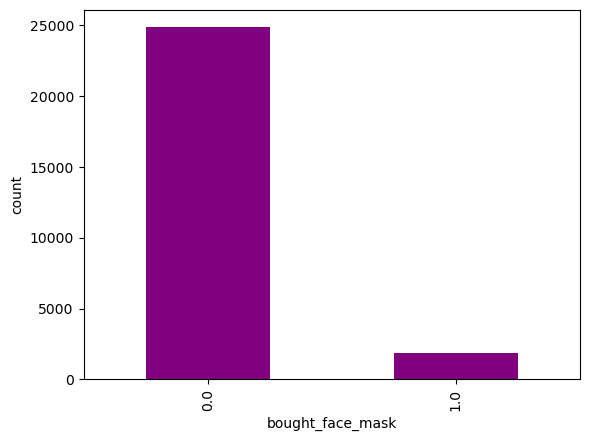

In [205]:
vaccine['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'purple')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

In [206]:
# filling 19 missing values by mode
vaccine['bought_face_mask'].fillna(vaccine['bought_face_mask'].mode()[0], inplace = True)

In [207]:
vaccine['wash_hands_frequently'].unique()
# 0-Washes hands frequently, 1=uses hand sanitizer -

array([ 0.,  1., nan])

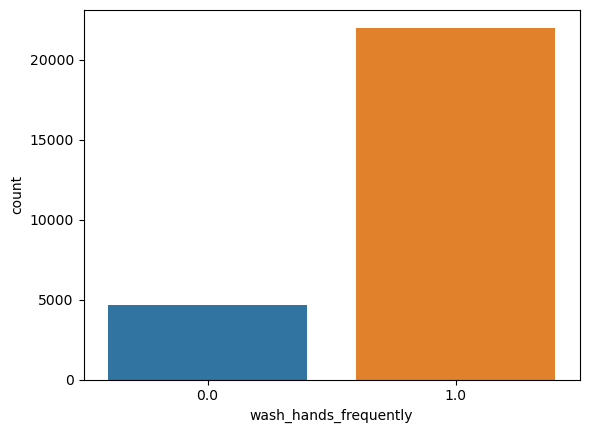

In [208]:
sns.countplot(x = 'wash_hands_frequently', data = vaccine)
plt.show()

In [209]:
# filling 42 missing values by mode
vaccine['wash_hands_frequently'].fillna(vaccine['wash_hands_frequently'].mode()[0], inplace = True)

In [210]:
vaccine['avoid_large_gatherings'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

In [211]:
vaccine['avoid_large_gatherings'].value_counts()


avoid_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64

In [212]:
# filling 87 missing values by mode
vaccine['avoid_large_gatherings'].fillna(vaccine['avoid_large_gatherings'].mode()[0], inplace = True)

In [213]:
vaccine['reduced_outside_home_cont'].unique()
# 0=no, 1=yes

array([ 1.,  0., nan])

In [214]:
vaccine['reduced_outside_home_cont'].value_counts()

reduced_outside_home_cont
0.0    17644
1.0     8981
Name: count, dtype: int64

In [215]:
vaccine['reduced_outside_home_cont'].value_counts()

reduced_outside_home_cont
0.0    17644
1.0     8981
Name: count, dtype: int64

In [216]:
# filling 82 missing values by mode
vaccine['reduced_outside_home_cont'].fillna(vaccine['reduced_outside_home_cont'].mode()[0], inplace = True)

In [217]:
vaccine['avoid_touch_face'].unique()
# 0=no, 1=yes

array([ 1.,  0., nan])

In [218]:
vaccine['avoid_touch_face'].value_counts()

avoid_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64

In [219]:
# filling 128 missing values by mode
vaccine['avoid_touch_face'].fillna(vaccine['avoid_touch_face'].mode()[0], inplace = True)

In [220]:
display(vaccine['dr_recc_h1n1_vacc'].unique(), vaccine['dr_recc_seasonal_vacc'].unique())
# 0=no, 1=yes

array([ 0., nan,  1.])

array([ 0., nan,  1.])

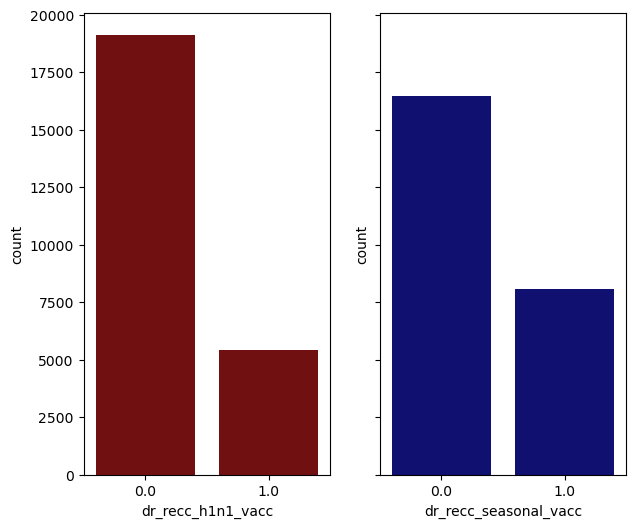

In [221]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'dr_recc_h1n1_vacc', data = vaccine, color = 'maroon', ax=ax[0])
sns.countplot(x = 'dr_recc_seasonal_vacc', data = vaccine, color = 'navy', ax=ax[1])
plt.show()

In [222]:
# filling 2160 missing values by mode
vaccine['dr_recc_h1n1_vacc'].fillna(vaccine['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
vaccine['dr_recc_seasonal_vacc'].fillna(vaccine['dr_recc_seasonal_vacc'].mode()[0], inplace = True)

In [223]:
vaccine['chronic_medic_condition'].value_counts()

chronic_medic_condition
0.0    18446
1.0     7290
Name: count, dtype: int64

In [224]:
# filling 971 missing values by mode
vaccine['chronic_medic_condition'].fillna(vaccine['chronic_medic_condition'].mode()[0], inplace = True)

<Axes: ylabel='cont_child_undr_6_mnths'>

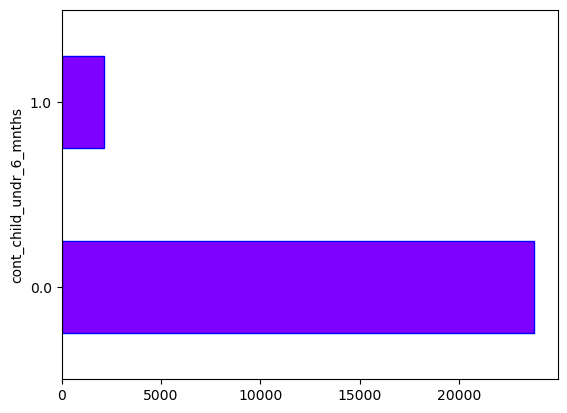

In [225]:
vaccine['cont_child_undr_6_mnths'].value_counts().plot(kind = 'barh', cmap = 'rainbow', edgecolor = 'b')

In [226]:
# filling 820 missing values by mode
vaccine['cont_child_undr_6_mnths'].fillna(vaccine['cont_child_undr_6_mnths'].mode()[0], inplace = True)

In [227]:
vaccine['is_health_worker'].value_counts()

is_health_worker
0.0    23004
1.0     2899
Name: count, dtype: int64

In [228]:
# filling 804 missing values by mode
vaccine['is_health_worker'].fillna(vaccine['is_health_worker'].mode()[0], inplace = True)

In [229]:
vaccine['has_health_insur'].unique()
# 0=no, 1=yes

array([ 1., nan,  0.])

<Axes: ylabel='has_health_insur'>

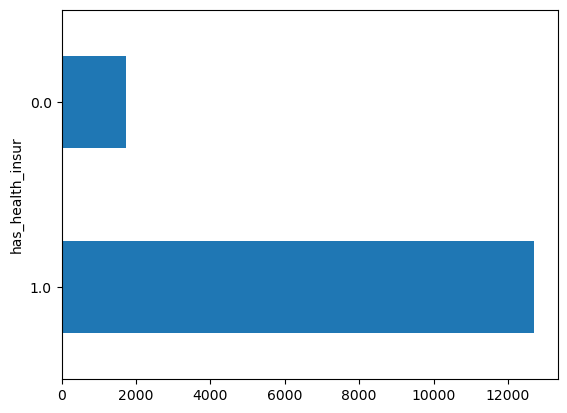

In [230]:
vaccine['has_health_insur'].value_counts().plot(kind = 'barh')

As no of missing values is 12274 which is almost equal to no of persons who have health insurance. Therefore, it is not a good option to replace missing values by mode as there is no surity whether they have insurance. Hence, putting them in another category named '2.0' which means 'data unknown'.

In [231]:
vaccine['has_health_insur'].fillna(2.0, inplace = True)

<Axes: ylabel='has_health_insur'>

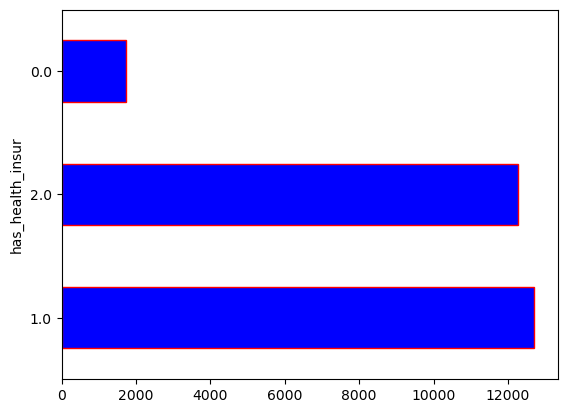

In [232]:
vaccine['has_health_insur'].value_counts().plot(kind = 'barh', color = 'b', edgecolor = 'r')

In [233]:
display(vaccine['is_h1n1_vacc_effective'].unique(), vaccine['is_seas_vacc_effective'].unique())
# 1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 
# 4=Thinks it is somewhat effective, 5=Thinks it is highly effective

array([ 3.,  5.,  4.,  2.,  1., nan])

array([ 2.,  4.,  5.,  3.,  1., nan])

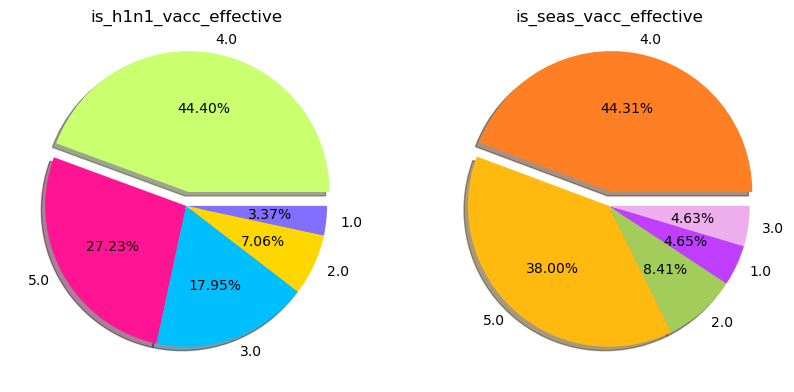

In [234]:
colors = ['#CAFF70', '#FF1493', '#00BFFF', '#FFD700', '#836FFF']
colors1 = ['#FF7F24', '#FFB90F', '#A2CD5A', '#BF3EFF', '#EEAEEE']
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [10,10])

ax1.pie(vaccine['is_h1n1_vacc_effective'].value_counts(), labels = vaccine['is_h1n1_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors, shadow = True)

ax2.pie(vaccine['is_seas_vacc_effective'].value_counts(), labels = vaccine['is_seas_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors1, shadow = True)

ax1.set_title('is_h1n1_vacc_effective')
ax2.set_title('is_seas_vacc_effective')

plt.show()

In [235]:
# filling 391 and 462 missing values respectively by mode
vaccine['is_h1n1_vacc_effective'].fillna(vaccine['is_h1n1_vacc_effective'].mode()[0], inplace = True)
vaccine['is_seas_vacc_effective'].fillna(vaccine['is_seas_vacc_effective'].mode()[0], inplace = True)

In [236]:
display(vaccine['is_h1n1_risky'].unique(), vaccine['is_seas_risky'].unique())
# 1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=don’t know if it is risky or not, 
# 4=Thinks it is a somewhat high risk, 5=Thinks it is very highly risky

array([ 1.,  4.,  3.,  2.,  5., nan])

array([ 1.,  2.,  4.,  3.,  5., nan])

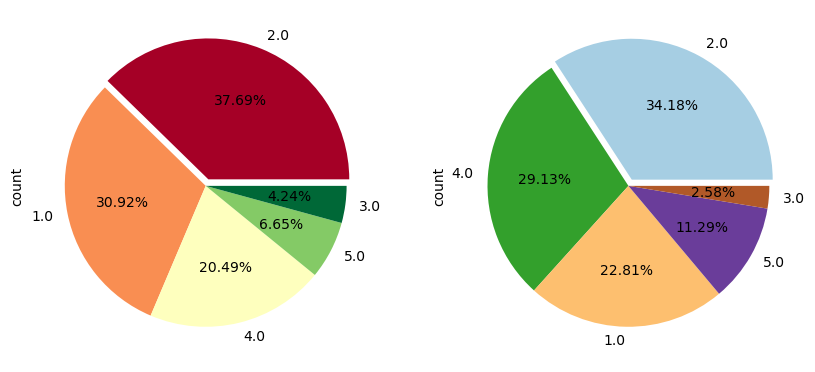

In [237]:
fig, ax = plt.subplots(1, 2, figsize = [10,10])
vaccine['is_h1n1_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'RdYlGn', ax = ax[0])
vaccine['is_seas_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Paired', ax = ax[1])
plt.show()

In [238]:
# filling 388 and 514 missing values respectively by mode
vaccine['is_h1n1_risky'].fillna(vaccine['is_h1n1_risky'].mode()[0], inplace = True)
vaccine['is_seas_risky'].fillna(vaccine['is_seas_risky'].mode()[0], inplace = True)

In [239]:
display(vaccine['sick_from_h1n1_vacc'].unique(), vaccine['sick_from_seas_vacc'].unique())
# 1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know, 4=Respondent is somewhat worried, 
# 5Respondent is very worried

array([ 2.,  4.,  1.,  5.,  3., nan])

array([ 2.,  4.,  1.,  5., nan,  3.])

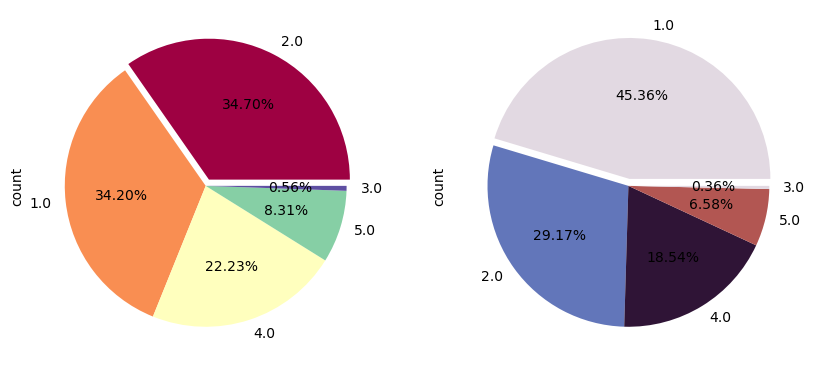

In [240]:
fig, ax = plt.subplots(1,2, figsize = [10,10])
vaccine['sick_from_h1n1_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Spectral', ax = ax[0])
vaccine['sick_from_seas_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'twilight', ax = ax[1])
plt.show()

In [241]:
# filling 395 and 537 missing values respectively by mode
vaccine['sick_from_h1n1_vacc'].fillna(vaccine['sick_from_h1n1_vacc'].mode()[0], inplace = True)
vaccine['sick_from_seas_vacc'].fillna(vaccine['sick_from_seas_vacc'].mode()[0], inplace = True)

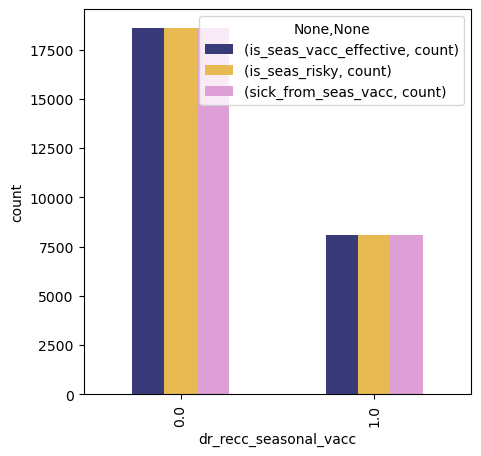

In [242]:
vaccine.groupby(['dr_recc_seasonal_vacc']).agg({'is_seas_vacc_effective' : ['count'],
                                      'is_seas_risky' :['count'],
                                      'sick_from_seas_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [5,5])
plt.ylabel('count')
plt.show()


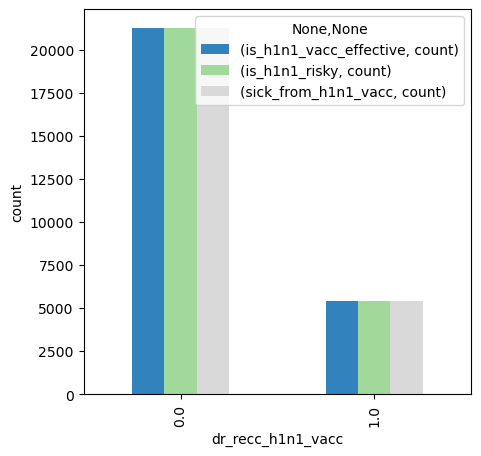

In [243]:
vaccine.groupby(['dr_recc_h1n1_vacc']).agg({'is_h1n1_vacc_effective' : ['count'],
                                      'is_h1n1_risky' :['count'],
                                      'sick_from_h1n1_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20c', figsize = [5,5])
plt.ylabel('count')
plt.show()

In [244]:
vaccine['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [245]:
vaccine['qualification'].value_counts()

qualification
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [246]:
# filling 1407 missing values by mode
vaccine['qualification'].fillna(vaccine['qualification'].mode()[0], inplace = True)


<Axes: ylabel='sex'>

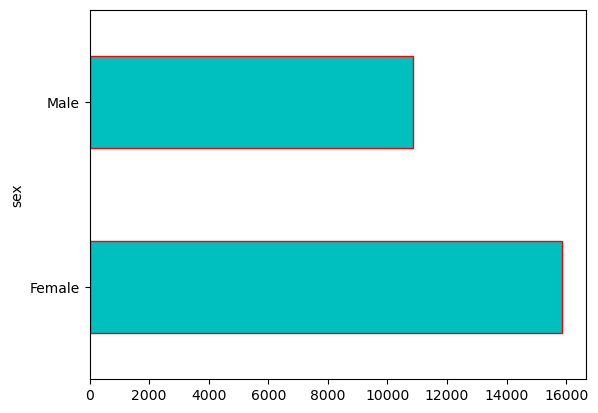

In [247]:
vaccine['sex'].value_counts().plot(kind = 'barh', color = 'c', edgecolor = 'r')
# no nan values

In [248]:
vaccine['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

<Axes: ylabel='count'>

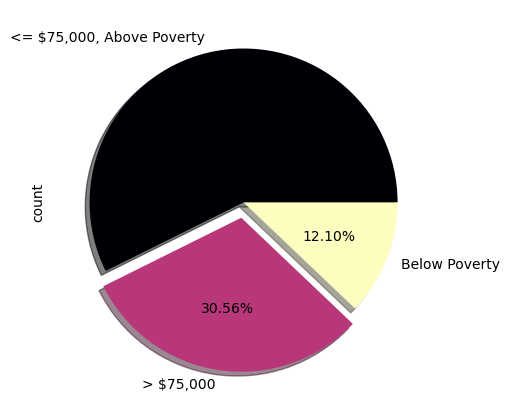

In [249]:
vaccine['income_level'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', cmap = 'magma',
                                            explode = [0,0.1,0], figsize = [5,5], shadow = True)

In [250]:
# no of missing values is 4423, better to create a new category as 'Unknown' as this will not skew the data and info will not be lost
vaccine['income_level'].fillna('Unknown', inplace = True)


In [251]:
vaccine['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [252]:
vaccine['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [253]:
vaccine['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [254]:
vaccine['housing_status'].unique()


array(['Own', 'Rent', nan], dtype=object)

<Axes: xlabel='housing_status'>

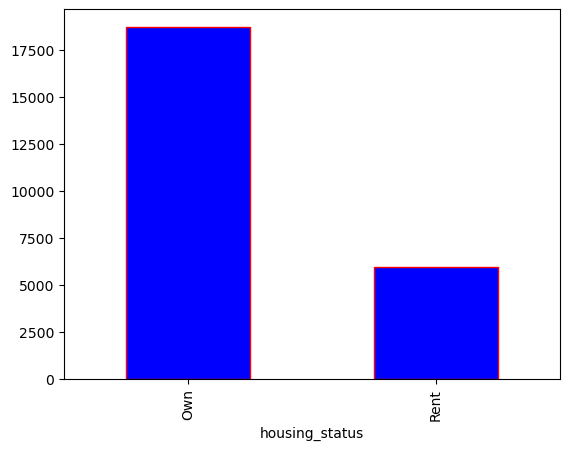

In [255]:
vaccine['housing_status'].value_counts().plot(kind = 'bar', color = 'b', edgecolor = 'r')

In [256]:
# filling 2402 missing values by mode
vaccine['housing_status'].fillna(vaccine['housing_status'].mode()[0], inplace = True)

In [257]:
vaccine['employment'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

<Axes: ylabel='count'>

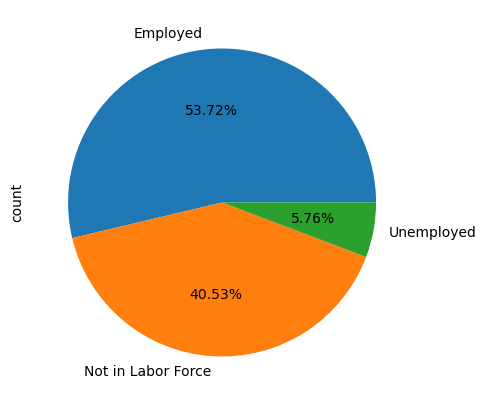

In [258]:
vaccine['employment'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5])

In [259]:
# filling 1463 missing values by mode
vaccine['employment'].fillna(vaccine['employment'].mode()[0], inplace = True)

In [260]:
display(vaccine['no_of_adults'].unique(), vaccine['no_of_children'].unique())

array([ 0.,  2.,  1.,  3., nan])

array([ 0.,  3.,  2.,  1., nan])

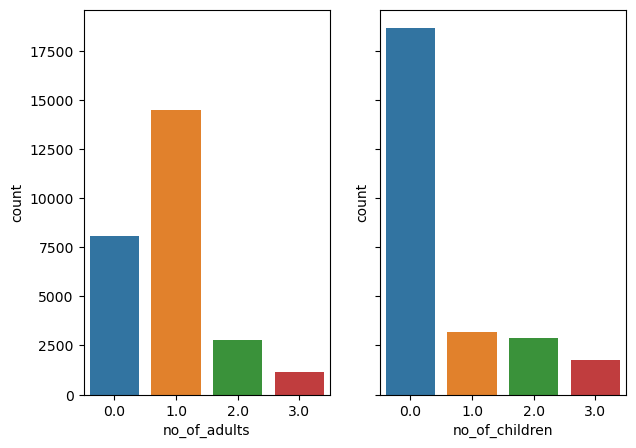

In [261]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data = vaccine, ax = ax[0])
sns.countplot( x = 'no_of_children', data = vaccine, ax = ax[1])
plt.show()

In [262]:
# filling 249 nan values by mode
vaccine['no_of_adults'].fillna(vaccine['no_of_adults'].mode()[0], inplace = True)
vaccine['no_of_children'].fillna(vaccine['no_of_children'].mode()[0], inplace = True)


In [263]:
vaccine['age_bracket'].value_counts()

age_bracket
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [264]:
vaccine.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status               1408
housing_status                  0
employment                      0
census_msa    

No outliers as data is categorical

In [265]:
vaccine1 = vaccine.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
       'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
       'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
       'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
       'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
       'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
       'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
       'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
        'h1n1_vaccine' : str})
vaccine1.dtypes.value_counts()

object    33
Name: count, dtype: int64

In [266]:
vaccine_dummy = pd.get_dummies(vaccine1, drop_first= True )


In [267]:
vaccine_dummy.shape

(26707, 70)

In [268]:
vaccine_dummy['h1n1_vaccine_1'].value_counts(normalize = True)

h1n1_vaccine_1
False    0.787546
True     0.212454
Name: proportion, dtype: float64

In [269]:
y=vaccine_dummy['h1n1_vaccine_1']
x=vaccine_dummy.drop(['h1n1_vaccine_1'], axis=1)

In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [271]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
40,sick_from_seas_vacc_3.0,0.011571
28,sick_from_h1n1_vacc_3.0,0.007397
36,is_seas_risky_3.0,0.002132
32,is_seas_vacc_effective_3.0,0.001958
19,is_h1n1_vacc_effective_2.0,0.001680
...,...,...
62,census_msa_Non-MSA,0.000229
11,avoid_touch_face_1.0,0.000225
61,"census_msa_MSA, Principle City",0.000218
14,chronic_medic_condition_1.0,0.000216


All variables are important as VIF values are less than 2.

In [272]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=88)

## Logistic Regression

In [273]:
log = LogisticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")


Training Score : 0.8558162755866201
Testing Score : 0.8442414257900255


## Model Evaluation

In [274]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [275]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15031,773
Act_1,2115,2111


In [276]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

       False       0.88      0.95      0.91     15804
        True       0.73      0.50      0.59      4226

    accuracy                           0.86     20030
   macro avg       0.80      0.73      0.75     20030
weighted avg       0.85      0.86      0.85     20030



In [277]:
cnfTest=pd.DataFrame(metrics.confusion_matrix(y_test , pred_test), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTest

,Pred_0,Pred_1
Act_0,4985,244
Act_1,796,652


In [278]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

       False       0.86      0.95      0.91      5229
        True       0.73      0.45      0.56      1448

    accuracy                           0.84      6677
   macro avg       0.79      0.70      0.73      6677
weighted avg       0.83      0.84      0.83      6677



In [279]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.945305,0.054695
1,0.965775,0.034225
2,0.404756,0.595244
3,0.988857,0.011143
4,0.799952,0.200048
...,...,...
20025,0.963749,0.036251
20026,0.935796,0.064204
20027,0.735832,0.264168
20028,0.775515,0.224485


In [280]:
x_train1=x_train.copy()

x_train1["Actual_Default"]=y_train
x_train1["Prob_Default"]=log.predict_proba(x_train)[:, 1]

x_train1

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,...,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,Actual_Default,Prob_Default
9353,True,False,False,True,False,False,True,False,True,True,...,False,False,True,False,False,False,False,False,False,0.054695
6317,False,True,False,True,False,False,True,False,True,False,...,True,False,True,False,False,False,False,False,False,0.034225
13542,False,True,False,True,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,0.595244
23986,False,True,False,False,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,0.011143
16025,True,False,False,False,True,True,True,False,True,True,...,True,False,True,False,False,False,False,False,True,0.200048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24938,False,False,False,False,True,False,True,False,True,False,...,False,True,False,False,True,True,False,False,False,0.036251
2481,False,False,True,True,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,0.064204
4047,False,False,True,True,False,False,True,False,True,True,...,False,True,True,False,False,False,True,False,False,0.264168
6432,True,False,False,True,False,False,True,False,True,False,...,True,False,True,False,False,True,False,False,True,0.224485


In [281]:
# Decile Analysis
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [282]:
# train_profile=profile_decile(x_train, y_train, log)
# train_profile.to_excel("train_profile.xlsx" )

# test_profile=profile_decile(x_test, y_test, log)
# test_profile.to_excel("test_profile.xlsx") 

In [283]:
newtrain_pred=np.where(log.predict_proba(x_train)[:,1] > 0.232280104, 1, 0) # based on KS value

In [284]:
cnfNewTrain=pd.DataFrame(metrics.confusion_matrix(y_train , newtrain_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTrain

,Pred_0,Pred_1
Act_0,12965,2839
Act_1,1056,3170


In [285]:
print(metrics.classification_report(y_train , newtrain_pred))

              precision    recall  f1-score   support

       False       0.92      0.82      0.87     15804
        True       0.53      0.75      0.62      4226

    accuracy                           0.81     20030
   macro avg       0.73      0.79      0.74     20030
weighted avg       0.84      0.81      0.82     20030



In [286]:
newtest_pred=np.where(log.predict_proba(x_test)[:,1] > 0.229209326, 1, 0) # based on KS value

In [287]:
cnfNewTest=pd.DataFrame(metrics.confusion_matrix(y_test , newtest_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTest

,Pred_0,Pred_1
Act_0,4273,956
Act_1,402,1046


In [288]:
print(metrics.classification_report(y_test , newtest_pred))

              precision    recall  f1-score   support

       False       0.91      0.82      0.86      5229
        True       0.52      0.72      0.61      1448

    accuracy                           0.80      6677
   macro avg       0.72      0.77      0.73      6677
weighted avg       0.83      0.80      0.81      6677



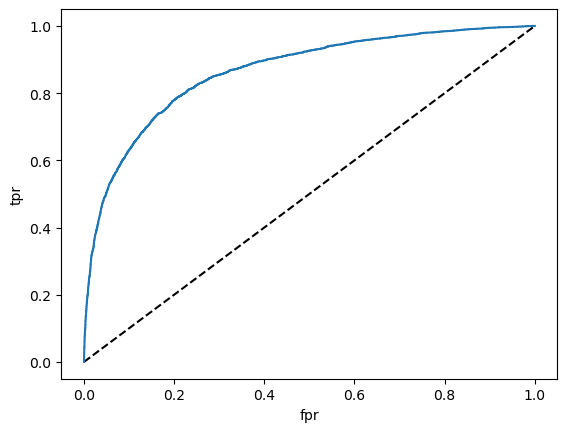

In [289]:
# Receiver Operating Characterestics 

probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [290]:
metrics.roc_auc_score(y_train,probs)

0.8646604470787018

### Model 	  ROC Score   	 Precision Score	   Recall Score	    F1score      AccuracyScore

0	   Logical Regression	   0.769679	   0.522217	  0.722376	  0.606201	  0.796465

In this case, Recall Score is important as we dont want to miss out on people who actually need a h1n1 vaccine shot.